In [5]:
# import pyforest
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.offline as pyo
%matplotlib inline

In [6]:
df=pd.read_excel("./Sample-data-ML-13AUG2020.xlsx")
print(df.columns)

Index(['RN', 'POLICY_REF', 'RANK', 'DND_FLAG', 'SERVICE_CODE', 'SERVICE_NAME',
       'PREVIOUS_MONTH_FLAG', 'FYLP_FLAG', 'CONTROL_GROUP_FLAG',
       'LAST_MONTH_FUNNEL', 'LAST_ASSIGNED_BUCKET', 'CUSTOMER_ZONE',
       'VAM_BASE', 'TICKET_SIZE', 'AUTO_MANDATE_FLAG', 'CONTACTABLE_FLAG',
       'DEEP_LAPSED_DECILE', 'LAPSATION_SCORE', 'FUP_DATE', 'ANNULIZED',
       'FUP_BUCKET', 'BOOKING_FREQUENCY', 'CHANNEL', 'RM_EMP_CODE',
       'FOS_SERVICEABLE', 'PERSISTENCY_FLAG', 'TERM_MONTH', 'FUP_MONTH',
       'PAYMETHOD', 'RC_SUB_STATUS', 'RC_STATUS', 'CLEAN_STATE',
       'P_PRODUCT_TYPE', 'PRODUCT_NAME', 'AGENT_STATUS', 'BEST_DISPOSITION'],
      dtype='object')


In [7]:
df=df[['TICKET_SIZE','AUTO_MANDATE_FLAG','FUP_DATE','ANNULIZED',
       'FUP_BUCKET', 'BOOKING_FREQUENCY', 'CHANNEL',
       'PERSISTENCY_FLAG', 'TERM_MONTH', 'FUP_MONTH',
       'PAYMETHOD','CLEAN_STATE','P_PRODUCT_TYPE', 'PRODUCT_NAME', 'AGENT_STATUS']]
df

,TICKET_SIZE,AUTO_MANDATE_FLAG,FUP_DATE,ANNULIZED,FUP_BUCKET,BOOKING_FREQUENCY,CHANNEL,PERSISTENCY_FLAG,TERM_MONTH,FUP_MONTH,PAYMETHOD,CLEAN_STATE,P_PRODUCT_TYPE,PRODUCT_NAME,AGENT_STATUS
0,5087.0,N,2020-03-28,5087.0,90,1,Agency,Above 61M Block,201203,202003,CA,Jharkhand,TRAD,INVESTGAIN,Active
1,1944.0,Y,2020-03-28,1944.0,90,1,Agency,Above 61M Block,201203,202003,ADI,Orissa,TRAD,SUPER SAVER,Active
2,11671.0,N,2019-08-07,11671.0,6,1,Agency,Above 61st Month,200908,201908,CA,Orissa,TRAD,INVEST PLUS,Active
3,12348.0,N,2018-07-19,6174.0,9,2,Agency,Above 61st Month,201307,201807,CA,Assam,TRAD,INVESTGAIN,Terminated
4,2305.0,N,2020-03-23,2305.0,90,1,Agency,Above 61M Block,200903,202003,CA,Assam,TRAD,SUPER SAVER,Terminated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,77120.0,N,2018-03-20,38560.0,9,1,Agency,Above 61st Month,201103,201803,CA,Tripura,TRAD,SUPER CASHGAIN,Terminated
1635,15938.0,N,2019-07-28,15938.0,7,1,Agency,49th Month,201507,201907,CA,West Bengal,TRAD,YOUNG ASSURE,Terminated
1636,26591.0,Y,2020-03-16,26591.0,90,1,Agency,25M Block,201803,202003,ADI,West Bengal,TRAD,LIFE INCOME ASSURE,Active
1637,50000.0,Y,2019-12-28,300000.0,2,12,Agency,25M Block,201706,201912,NACH,Uttar Pradesh,ULIP,FUTURE WEALTH GAIN,Active


In [8]:
df['TICKET_SIZE']=df.TICKET_SIZE.astype(float)
df['TICKET_SIZE']=df.TICKET_SIZE.astype(float)
df['ANNULIZED']=df.ANNULIZED.astype(float)
df['BOOKING_FREQUENCY']=df.BOOKING_FREQUENCY.astype(float)

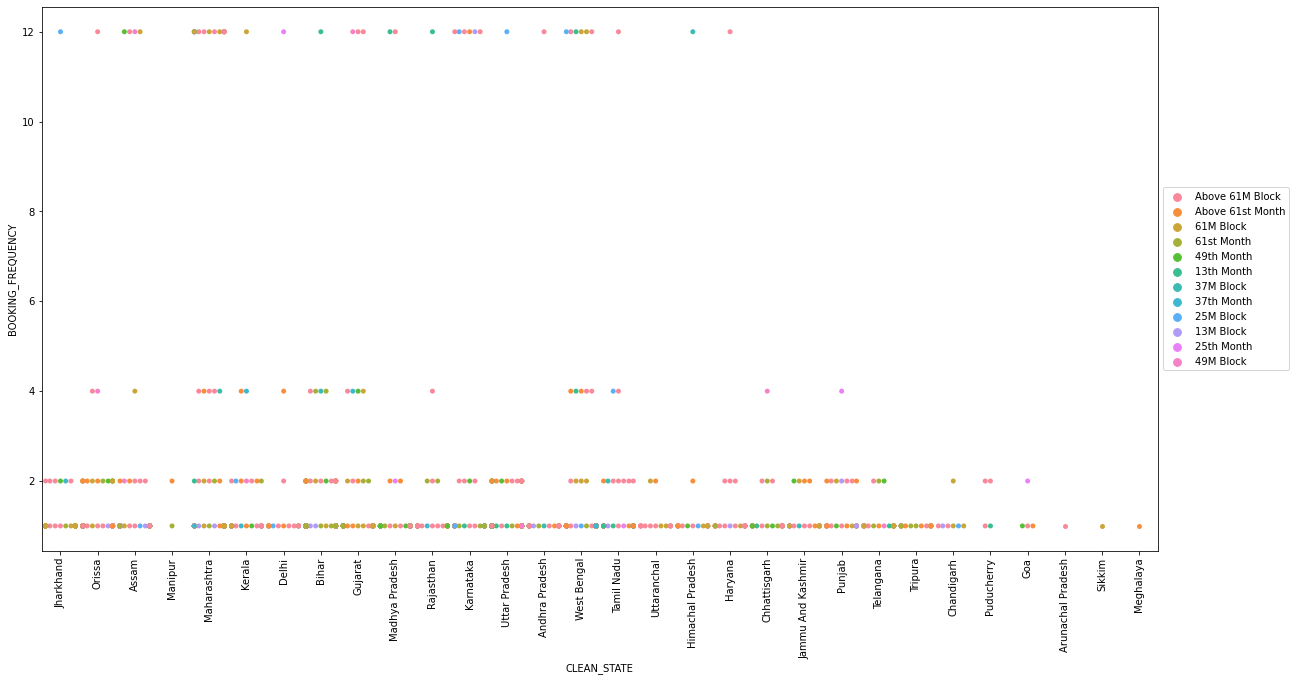

In [9]:
#executing slowly
plt.figure(figsize=(20,10))
sns.swarmplot(df['CLEAN_STATE'],df['BOOKING_FREQUENCY'],hue=df['PERSISTENCY_FLAG'])
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

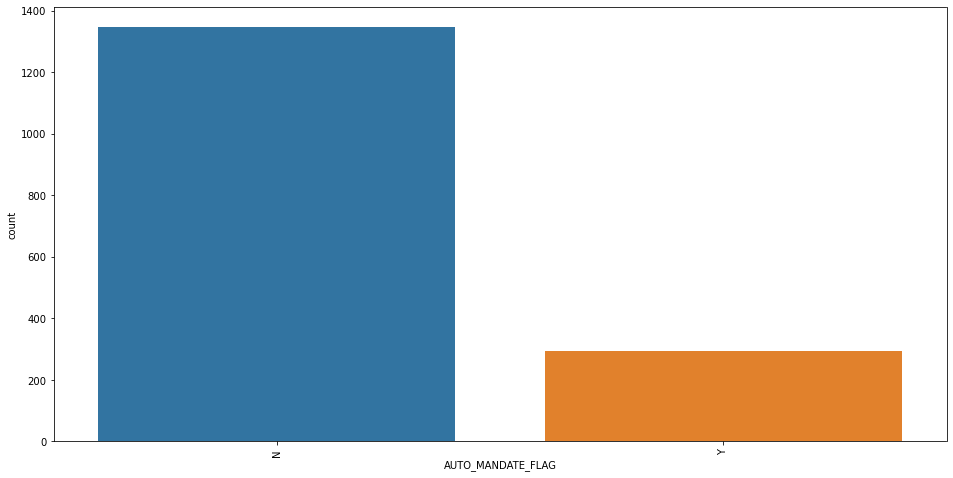

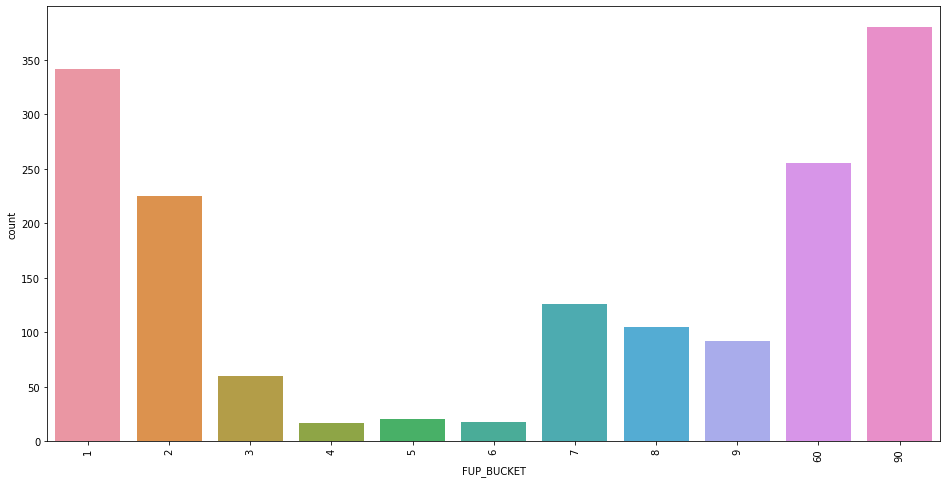

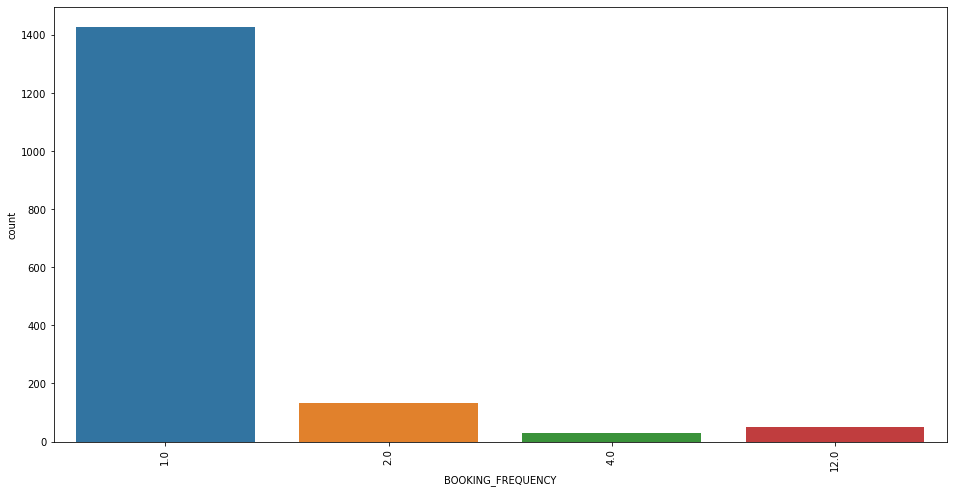

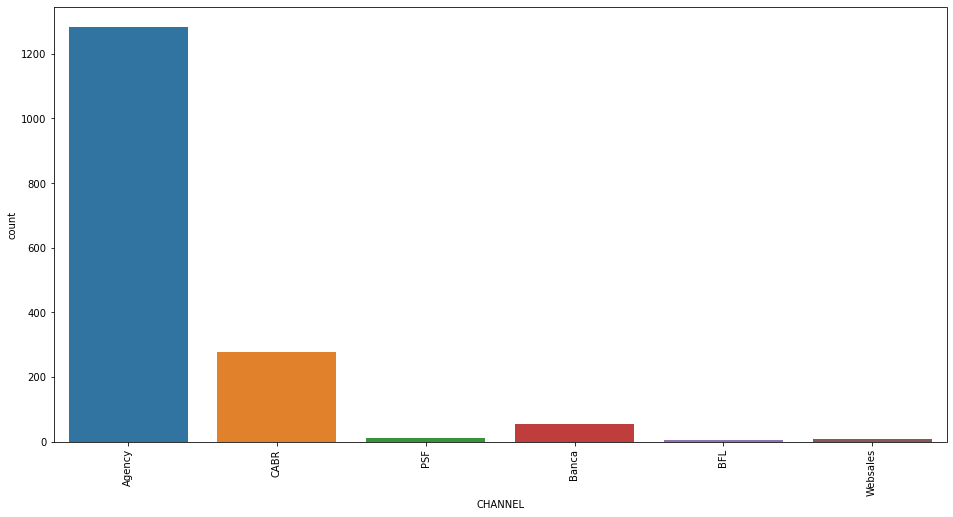

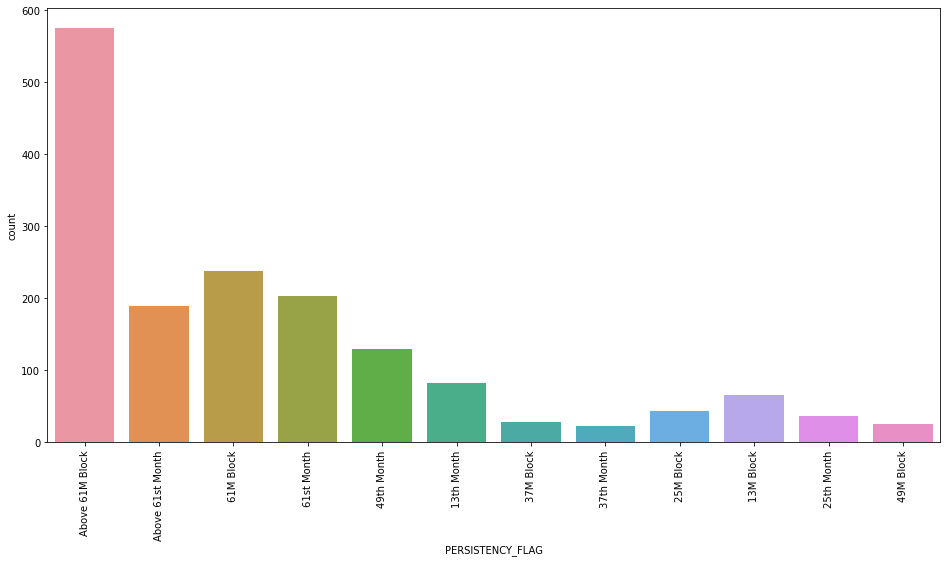

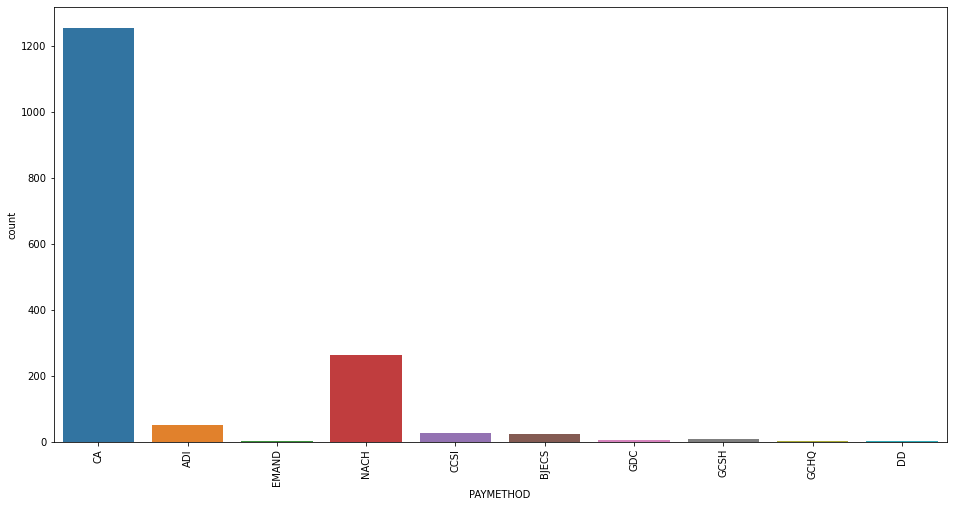

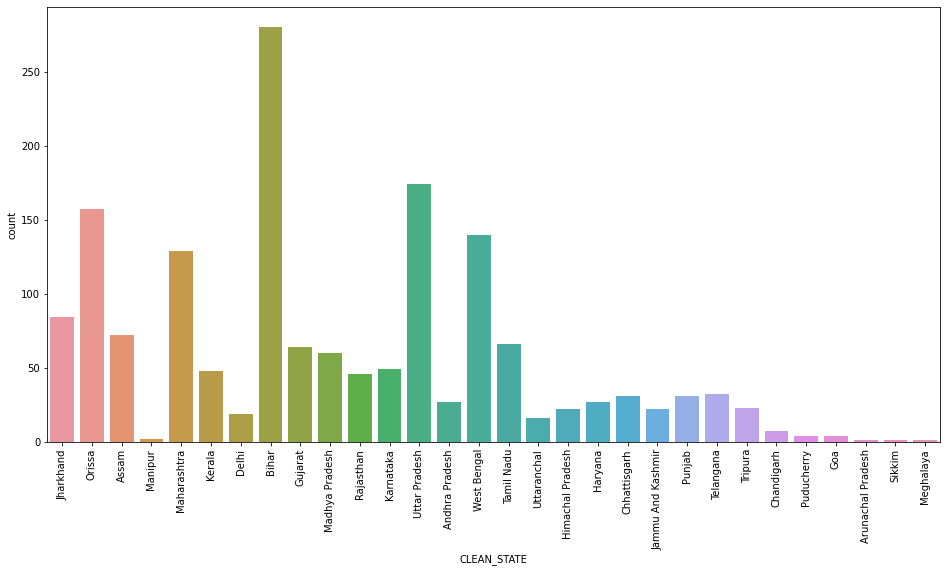

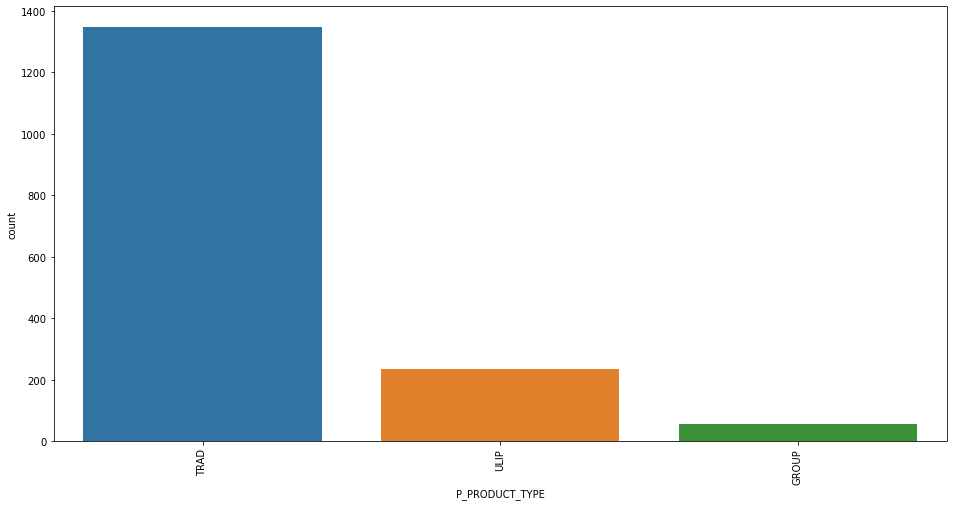

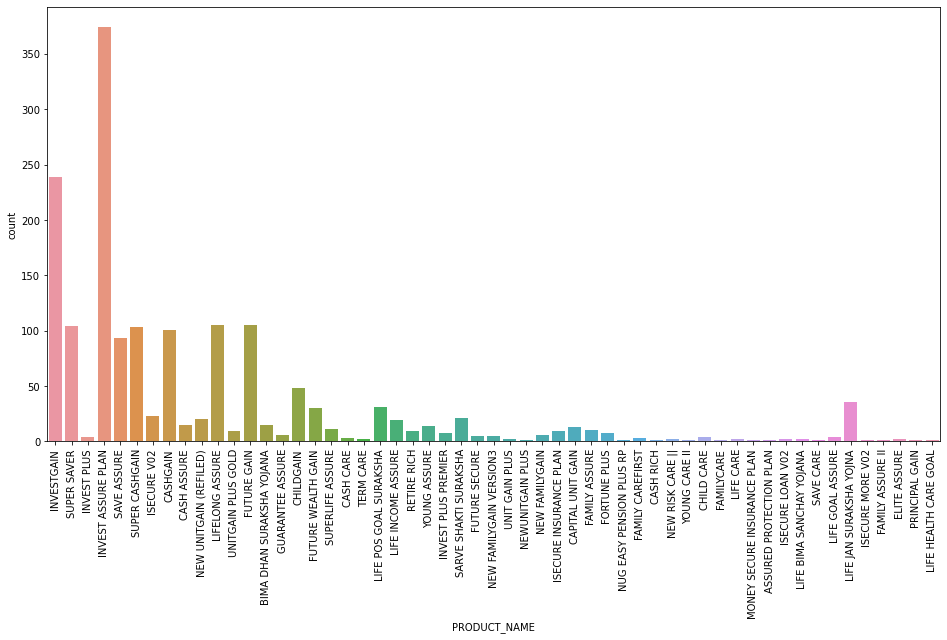

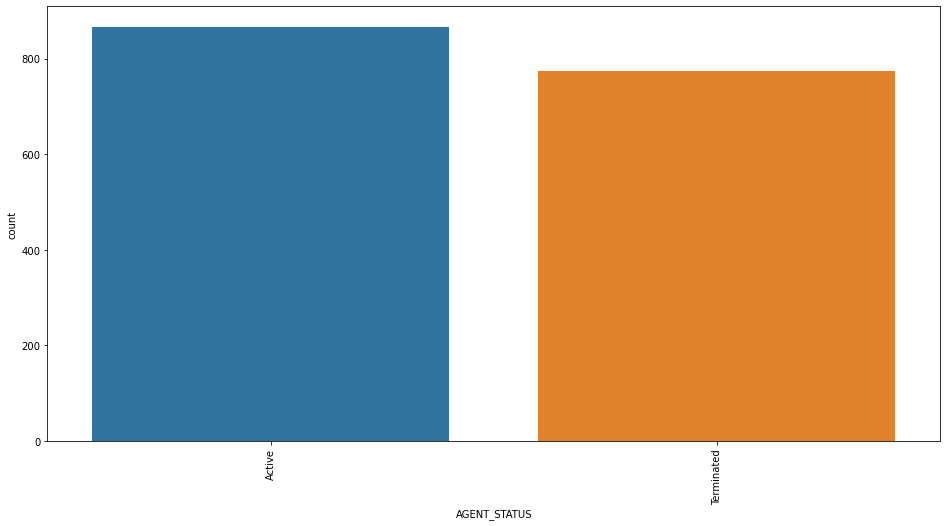

In [10]:
df_count =df.iloc[:,[1,4,5,6,7,10,11,12,13,14]]
for i in df_count.columns:
    plt.figure(figsize=(16,8))
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

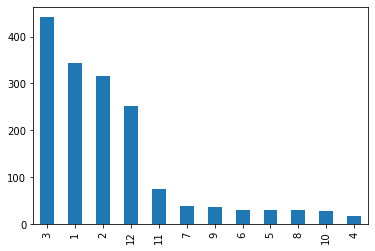

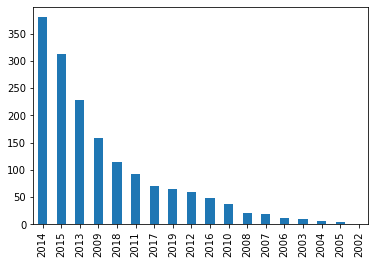

In [11]:
term_mnth=pd.to_datetime(df['TERM_MONTH'],format='%Y%m')
x=term_mnth.dt.month
x_=term_mnth.dt.year
# x_.head(50)
# plt.figure(figsize=(16,20))
# plt.xticks([range(0,13)])
# fig, ax = plt.subplots(figsize =(10, 7)) 
# plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
# ax.hist(x, bins=11)
# plt.show()
x.value_counts().plot(kind='bar')
plt.show()
x_.value_counts().plot(kind='bar')
# fig, ax = plt.subplots(figsize =(10, 7)) 
# plt.xticks(list(range(2002,2020)), rotation=90)
# ax.hist(x_, bins=17)
plt.show()


# zx=pd.DataFrame({'x':x,'x_':x_})
# print(zx)
# zx.groupby(x).x_.count().plot(kind='bar')

In [12]:
x_mnth = df.FUP_DATE.dt.month
d=df.groupby([x,x_]).count()
x_.value_counts()
# d.plot(kind='bar',figsize=(50,10))
# (x_==2002).sum()

2014    380
2015    312
2013    228
2009    158
2018    115
2011     93
2017     71
2019     65
2012     60
2016     48
2010     37
2008     21
2007     18
2006     12
2003      9
2004      6
2005      5
2002      1
Name: TERM_MONTH, dtype: int64

# PIVOT and GroupBY

In [13]:
df.columns

Index(['TICKET_SIZE', 'AUTO_MANDATE_FLAG', 'FUP_DATE', 'ANNULIZED',
       'FUP_BUCKET', 'BOOKING_FREQUENCY', 'CHANNEL', 'PERSISTENCY_FLAG',
       'TERM_MONTH', 'FUP_MONTH', 'PAYMETHOD', 'CLEAN_STATE', 'P_PRODUCT_TYPE',
       'PRODUCT_NAME', 'AGENT_STATUS'],
      dtype='object')

In [14]:

zim=pd.pivot_table(df,index=['PRODUCT_NAME','CLEAN_STATE','PAYMETHOD'],margins=True, aggfunc='count',columns='AGENT_STATUS')
# plt.figure(figsize=(16,10))
# zim.plot(kind='bar',figsize=(50,10))
# plt.xticks(rotation=90)
# plt.show()
zim.head(50)
zim.loc[('assured_total','**********','**'),:]=zim.loc['ASSURED PROTECTION PLAN'].sum()
zim

C:\Users\New\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2877: PerformanceWarning:

indexing past lexsort depth may impact performance.



ANNULIZED             \
AGENT_STATUS                                          Active Terminated   
PRODUCT_NAME              CLEAN_STATE    PAYMETHOD                        
ASSURED PROTECTION PLAN   Bihar          CA              NaN        1.0   
BIMA DHAN SURAKSHA YOJANA Andhra Pradesh NACH            NaN        2.0   
                          Assam          CA              NaN        3.0   
                                         NACH            NaN        1.0   
                          Madhya Pradesh CA              NaN        2.0   
...                                                      ...        ...   
YOUNG ASSURE              Tamil Nadu     CA              NaN        1.0   
                          West Bengal    CA              1.0        1.0   
YOUNG CARE II             Rajasthan      CA              NaN        1.0   
All                                                    866.0      773.0   
assured_total             **********     **              0.0        1.0   

                                                           AUTO_MANDATE_FLAG  \
AGENT_STATUS                                           All            Active   
PRODUCT_NAME              CLEAN_STATE    PAYMETHOD                             
ASSURED PROTECTION PLAN   Bihar          CA            1.0               NaN   
BIMA DHAN SURAKSHA YOJANA Andhra Pradesh NACH          2.0               NaN   
                          Assam          CA            3.0               NaN   
                                         NACH          1.0               NaN   
                          Madhya Pradesh CA            2.0               NaN   
...                                                    ...               ...   
YOUNG ASSURE              Tamil Nadu     CA            1.0               NaN   
                          West Bengal    CA            2.0               1.0   
YOUNG CARE II             Rajasthan      CA            1.0               NaN   
All                                                 1639.0             866.0   
assured_total             **********     **            1.0               0.0   

                                                                       \
AGENT_STATUS                                       Terminated     All   
PRODUCT_NAME              CLEAN_STATE    PAYMETHOD                      
ASSURED PROTECTION PLAN   Bihar          CA               1.0     1.0   
BIMA DHAN SURAKSHA YOJANA Andhra Pradesh NACH             2.0     2.0   
                          Assam          CA               3.0     3.0   
                                         NACH             1.0     1.0   
                          Madhya Pradesh CA               2.0     2.0   
...                                                       ...     ...   
YOUNG ASSURE              Tamil Nadu     CA               1.0     1.0   
                          West Bengal    CA               1.0     2.0   
YOUNG CARE II             Rajasthan      CA               1.0     1.0   
All                                                     773.0  1639.0   
assured_total             **********     **               1.0     1.0   

                                                   BOOKING_FREQUENCY  \
AGENT_STATUS                                                  Active   
PRODUCT_NAME              CLEAN_STATE    PAYMETHOD                     
ASSURED PROTECTION PLAN   Bihar          CA                      NaN   
BIMA DHAN SURAKSHA YOJANA Andhra Pradesh NACH                    NaN   
                          Assam          CA                      NaN   
                                         NACH                    NaN   
                          Madhya Pradesh CA                      NaN   
...                                                              ...   
YOUNG ASSURE              Tamil Nadu     CA                      NaN   
                          West Bengal    CA                      1.0   
YOUNG CARE II             Rajasthan      CA                     

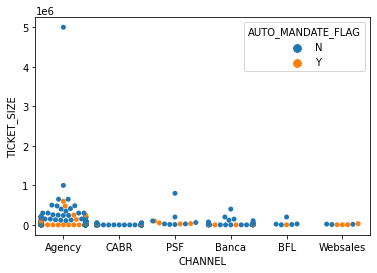

In [16]:
sns.swarmplot(x=df.CHANNEL,y=df.TICKET_SIZE,data=df,hue=df.AUTO_MANDATE_FLAG)
plt.show()

No handles with labels found to put in legend.


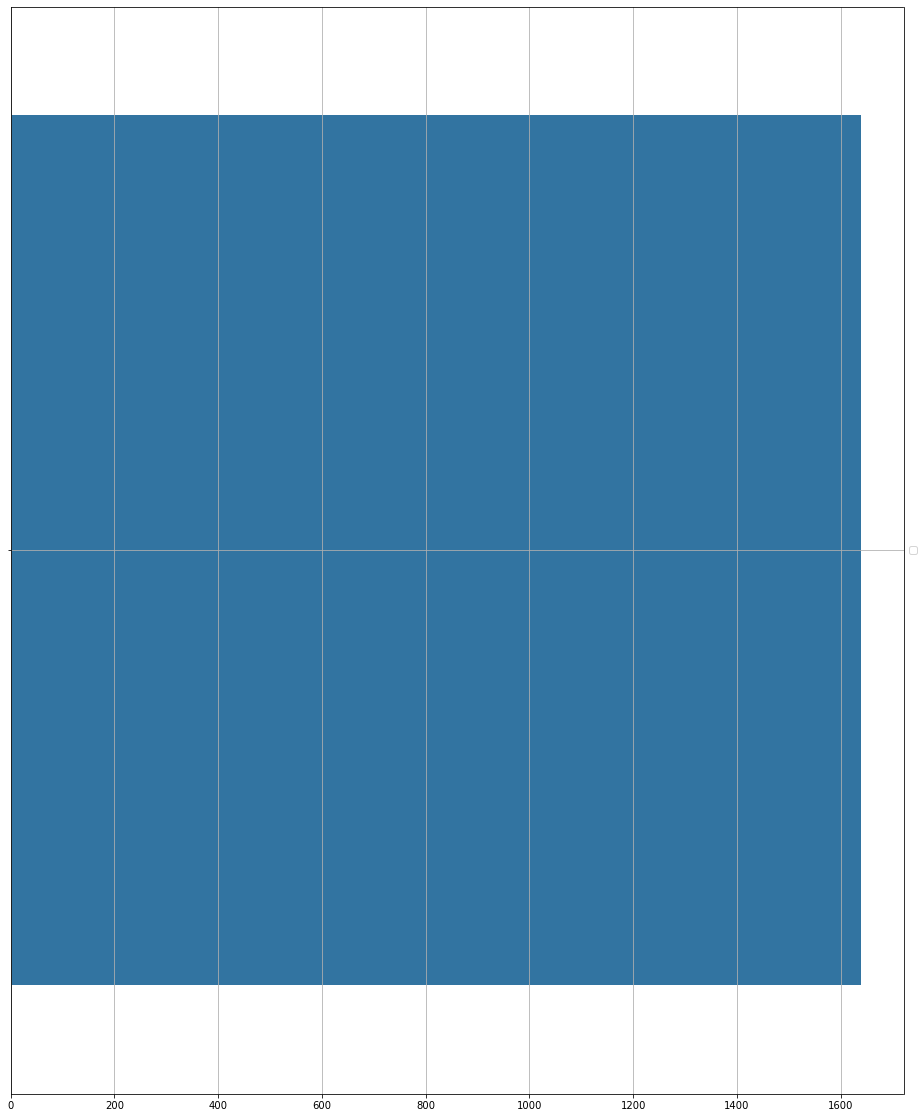

In [9]:
plt.figure(figsize=(16,20))
sns.barplot(x=df.PRODUCT_NAME.count(),data=df,dodge=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.grid(b=True)
plt.show()

In [18]:
# import plotly.graph_objs as go
# plotly_data = [go.Bar(x=df.PAYMETHOD,y=df.TICKET_SIZE)]
# layout = go.Layout(title='yryradkasdasd')
# fig = go.Figure(data=plotly_data,layout=layout)
# pyo.plot(plotly_data)

'temp-plot.html'

In [282]:
pivot_data = pd.pivot_table(df,values='P_PRODUCT_TYPE',index='PAYMETHOD')
pivot_data.plot(kind='scatter')
# sns.barplot(x=df.PAYMETHOD,y=df.index,data=df,hue=df.CHANNEL)
# plt.savefig('sadsa.png',dpi=500)
# plt.show()

DataError: No numeric types to aggregate

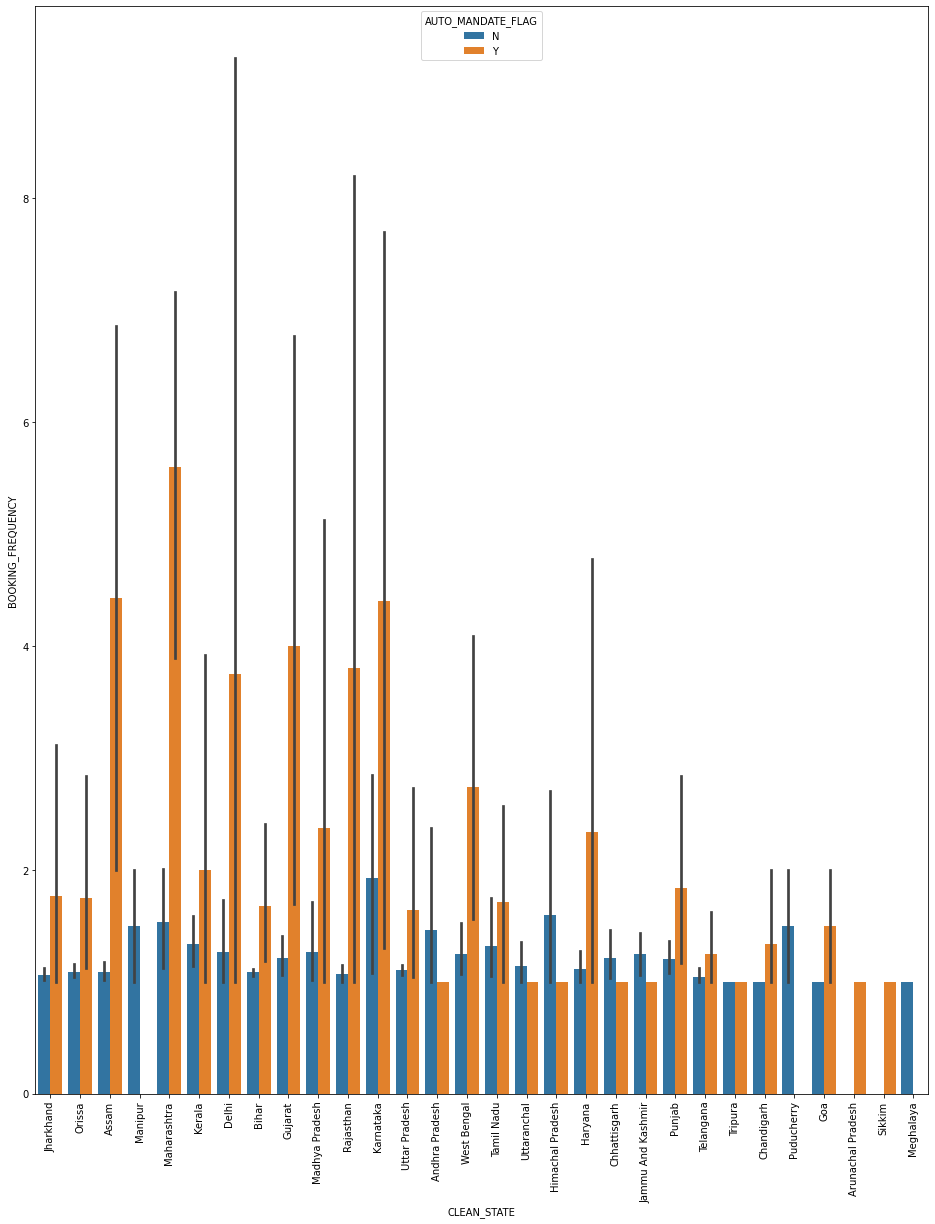

In [199]:
plt.figure(figsize=(16,20))
sns.barplot(df.CLEAN_STATE,df.BOOKING_FREQUENCY,hue=df.AUTO_MANDATE_FLAG)
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

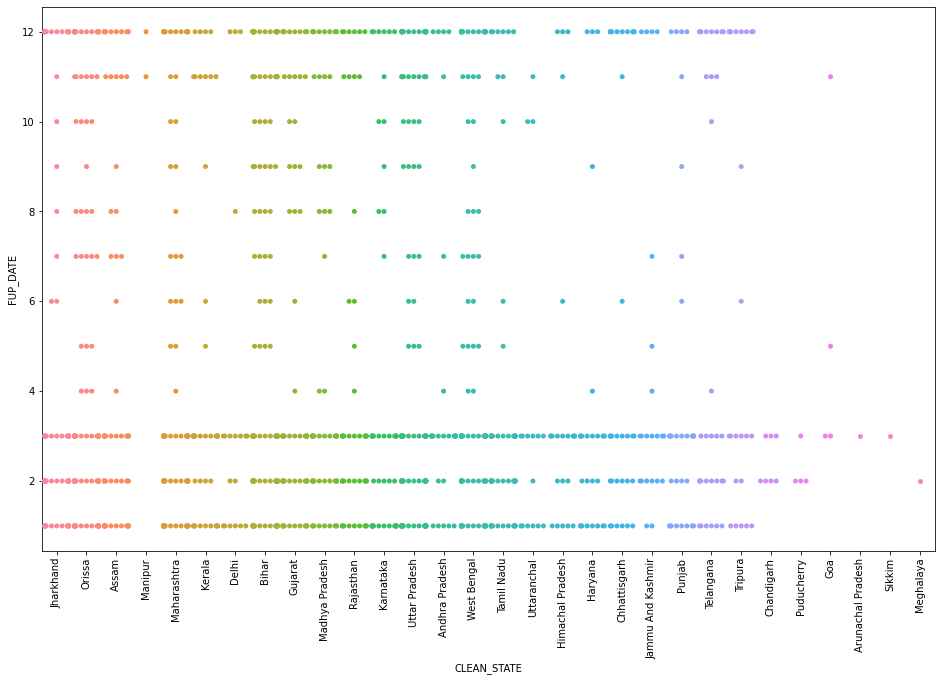

In [146]:
plt.figure(figsize=(16,10))
sns.swarmplot(df.CLEAN_STATE,df.FUP_DATE.dt.month,dodge=True)
# plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.xticks(rotation=90)

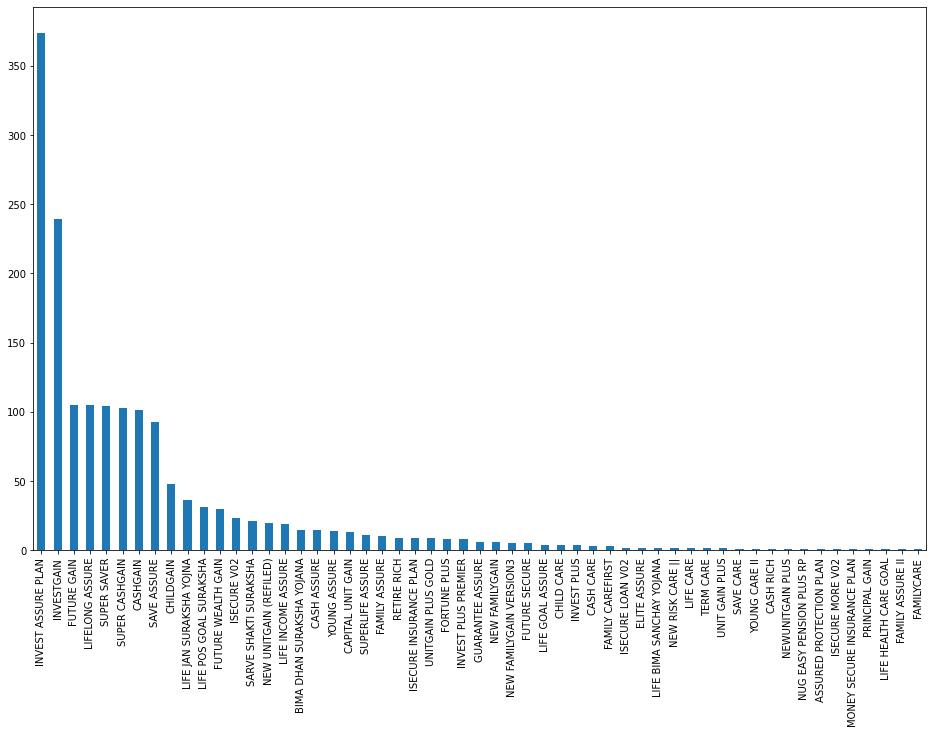

In [23]:
df.head(3)
var=df.PRODUCT_NAME.value_counts()
# sns.barplot(x='CLEAN_STATE',y='')
plt.figure(figsize=(16,10))
var.plot(kind='bar')

In [191]:
##############don't do######################################
# g=df.groupby(['CLEAN_STATE','P_PRODUCT_TYPE','PRODUCT_NAME']).count().plot(kind='bar')
# g1=df.groupby(['CLEAN_STATE'])

# andhra_df = g.get_group('Andhra Pradesh').median()
# g.get_group(('Andhra Pradesh','TRAD','CASHGAIN'))
# for title, group in df.groupby('CLEAN_STATE'):
#     plt.figure(figsize=(16,18))
#     group.plot(x='P_PRODUCT_TYPE', y='BOOKING_FREQUENCY', title=title,kind='bar')

In [25]:
# df.reset_index().pivot(index='BOOKING_FREQUENCY',columns='PRODUCT_NAME',values='P_PRODUCT_TYPE')
# df.set_index(['BOOKING_FREQUENCY', 'PRODUCT_NAME', 'P_PRODUCT_TYPE'], append=True)
df

,TICKET_SIZE,AUTO_MANDATE_FLAG,FUP_DATE,ANNULIZED,FUP_BUCKET,BOOKING_FREQUENCY,CHANNEL,PERSISTENCY_FLAG,TERM_MONTH,FUP_MONTH,PAYMETHOD,CLEAN_STATE,P_PRODUCT_TYPE,PRODUCT_NAME,AGENT_STATUS
0,5087.0,N,2020-03-28,5087.0,90,1.0,Agency,Above 61M Block,201203,202003,CA,Jharkhand,TRAD,INVESTGAIN,Active
1,1944.0,Y,2020-03-28,1944.0,90,1.0,Agency,Above 61M Block,201203,202003,ADI,Orissa,TRAD,SUPER SAVER,Active
2,11671.0,N,2019-08-07,11671.0,6,1.0,Agency,Above 61st Month,200908,201908,CA,Orissa,TRAD,INVEST PLUS,Active
3,12348.0,N,2018-07-19,6174.0,9,2.0,Agency,Above 61st Month,201307,201807,CA,Assam,TRAD,INVESTGAIN,Terminated
4,2305.0,N,2020-03-23,2305.0,90,1.0,Agency,Above 61M Block,200903,202003,CA,Assam,TRAD,SUPER SAVER,Terminated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,77120.0,N,2018-03-20,38560.0,9,1.0,Agency,Above 61st Month,201103,201803,CA,Tripura,TRAD,SUPER CASHGAIN,Terminated
1635,15938.0,N,2019-07-28,15938.0,7,1.0,Agency,49th Month,201507,201907,CA,West Bengal,TRAD,YOUNG ASSURE,Terminated
1636,26591.0,Y,2020-03-16,26591.0,90,1.0,Agency,25M Block,201803,202003,ADI,West Bengal,TRAD,LIFE INCOME ASSURE,Active
1637,50000.0,Y,2019-12-28,300000.0,2,12.0,Agency,25M Block,201706,201912,NACH,Uttar Pradesh,ULIP,FUTURE WEALTH GAIN,Active


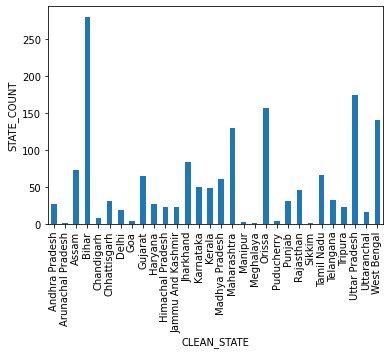

In [26]:
# x_df=df.pivot_table(df,index='CLEAN_STATE',columns='PRODUCT_NAME')
x_df=df.groupby('CLEAN_STATE').PRODUCT_NAME.count()
plt.ylabel("STATE_COUNT")
x_df.plot(kind='bar')


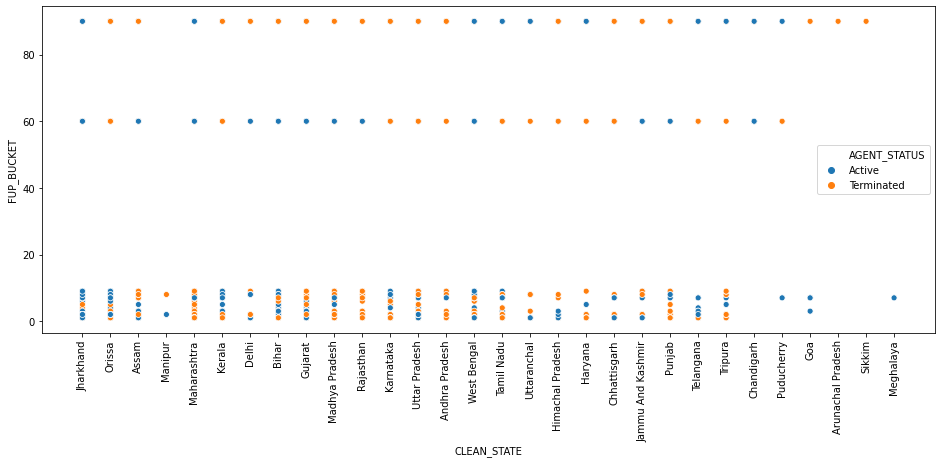

In [138]:
xc=df.index
plt.figure(figsize=(16,6))
x=[1,2,3,4,5,6,7,8,9,60,90]
# xi = list(range(len(x)))
sns.scatterplot(df['CLEAN_STATE'],df.FUP_BUCKET,hue=df.AGENT_STATUS)
# plt.scatter(df['CLEAN_STATE'],df.FUP_BUCKET)
# plt.xticks(x)#setting values in x-axis
# plt.xlim(0,99)
plt.xticks(rotation=90)
plt.show()
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

C:\Users\New\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



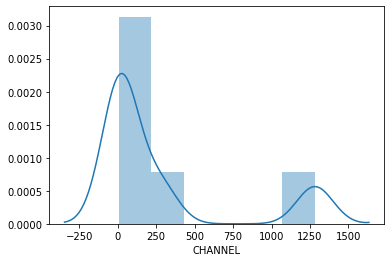

In [137]:
sns.distplot(df.CHANNEL.value_counts())

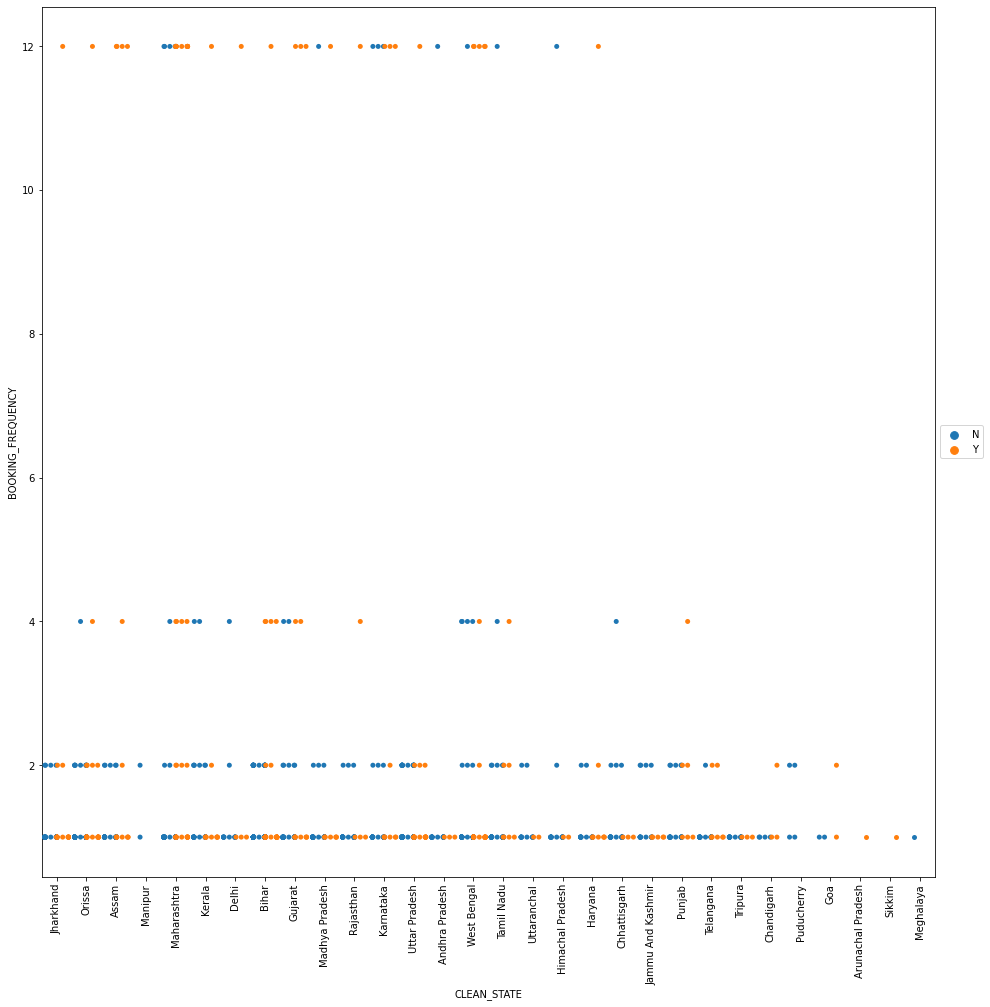

In [135]:
plt.figure(figsize=(16,16))
sns.swarmplot(df.CLEAN_STATE,df.BOOKING_FREQUENCY,df.AUTO_MANDATE_FLAG,dodge=True)
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

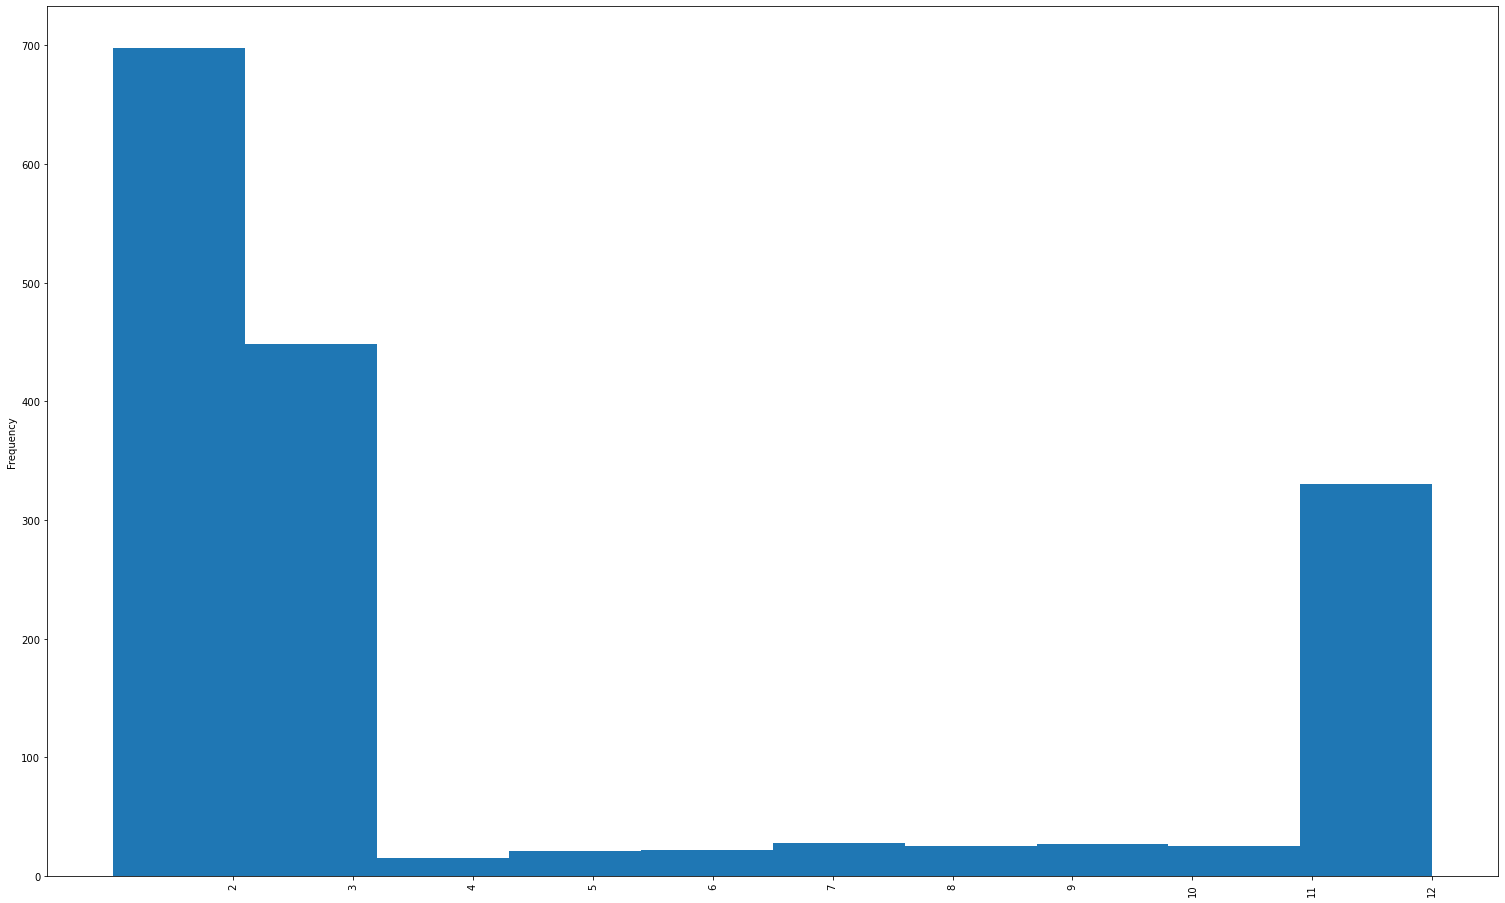

In [127]:
plt.figure(figsize=(26,16))
# sns.barplot(df.FUP_DATE.dt.month,df.PRODUCT_NAME)
x,y=df.PRODUCT_NAME,df.FUP_DATE.dt.month
# x.plot(kind='bar')
y.plot(kind='hist')
plt.xticks([2,3,4,5,6,7,8,9,10,11,12])
plt.xticks(rotation=90)
plt.show()

<Figure size 1872x1152 with 0 Axes>

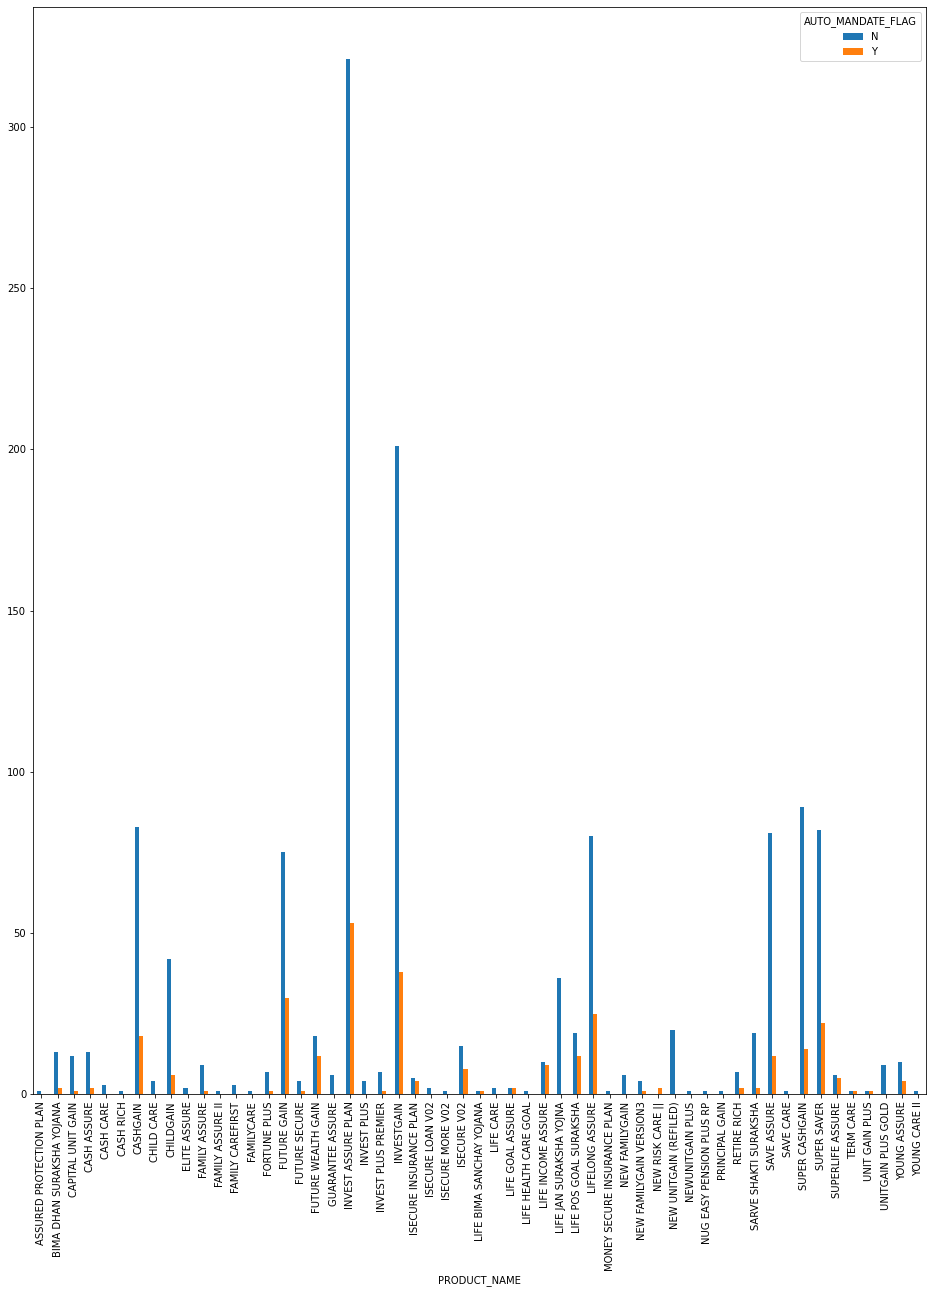

In [128]:
plt.figure(figsize=(26,16))

my_tab = pd.crosstab(index = df["PRODUCT_NAME"],columns=df['AUTO_MANDATE_FLAG']) 
# print(my_tab)
my_tab.plot(kind='bar',figsize=(16,20))
plt.show()

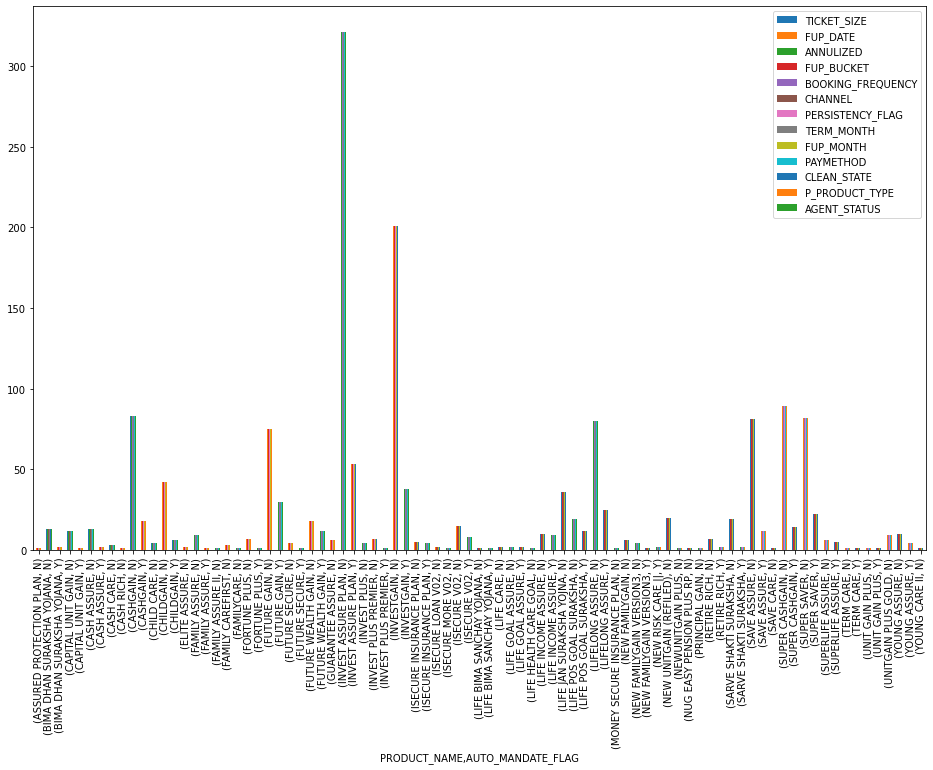

In [182]:
d=df.groupby(['PRODUCT_NAME','AUTO_MANDATE_FLAG']).count()
d.plot(kind='bar',figsize=(16,10))

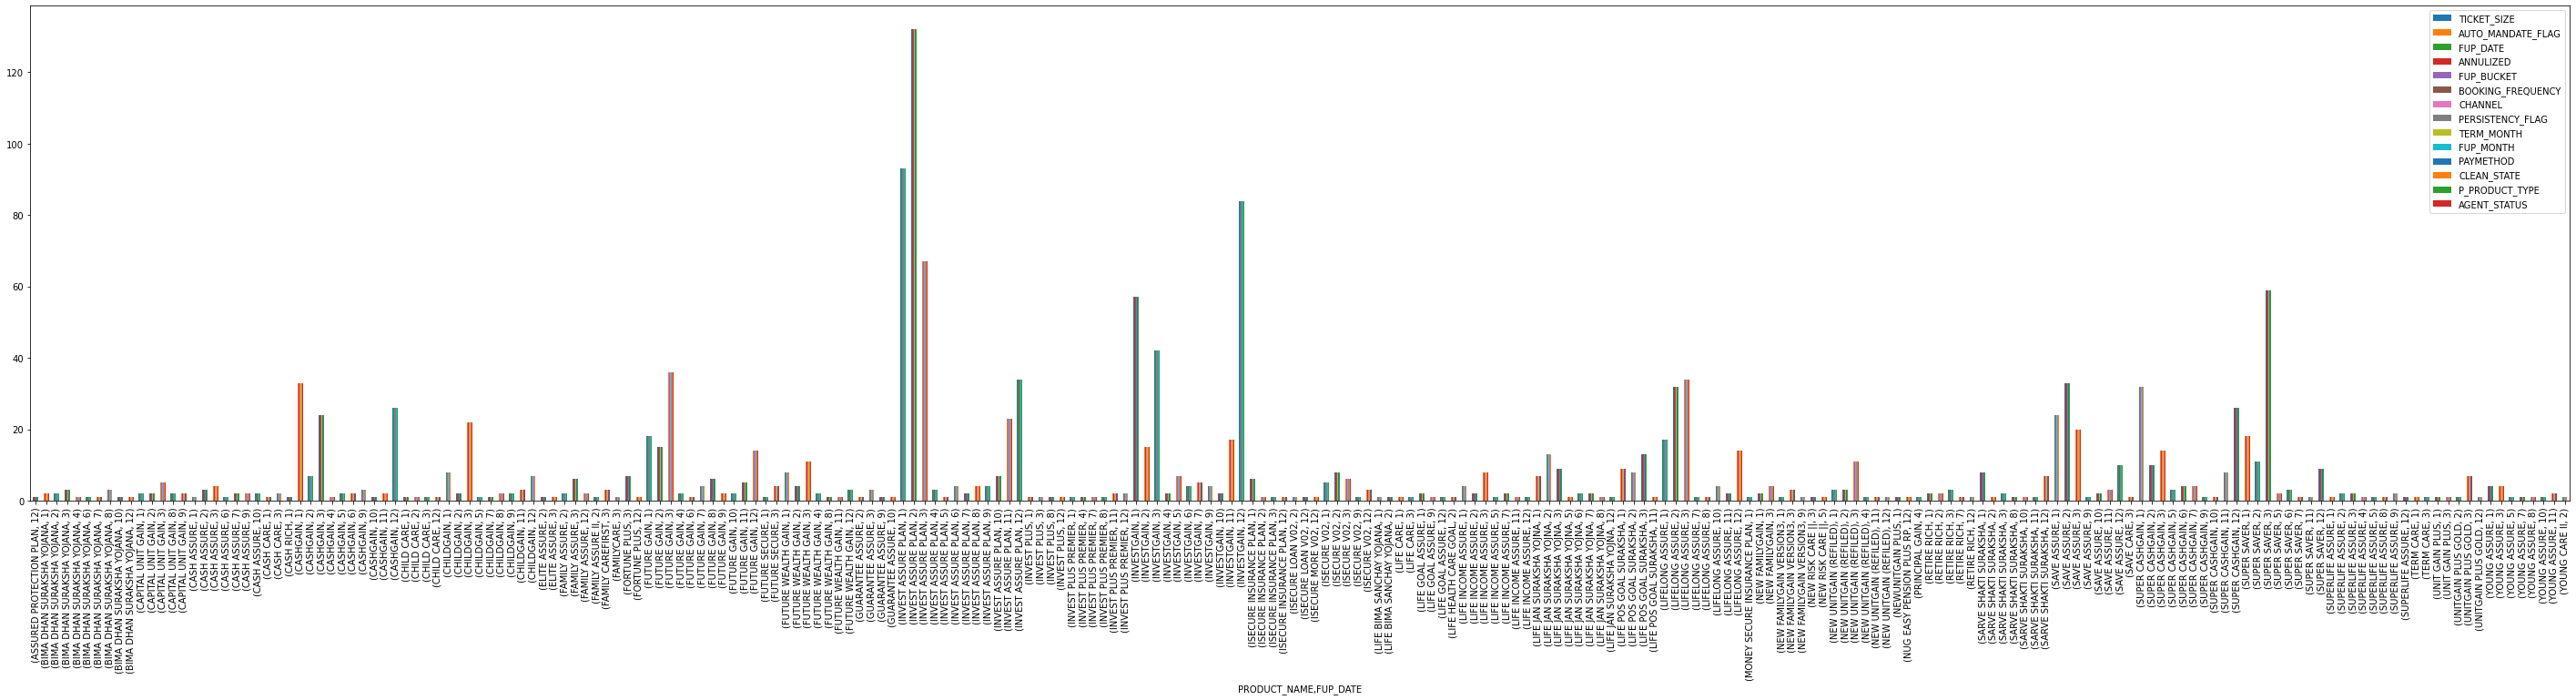

In [126]:
x_mnth = df.FUP_DATE.dt.month
d=df.groupby(['PRODUCT_NAME',x_mnth]).count()
# plt.subplots_adjust(bottom = 0.75) 
d.plot(kind='bar',figsize=(50,10))

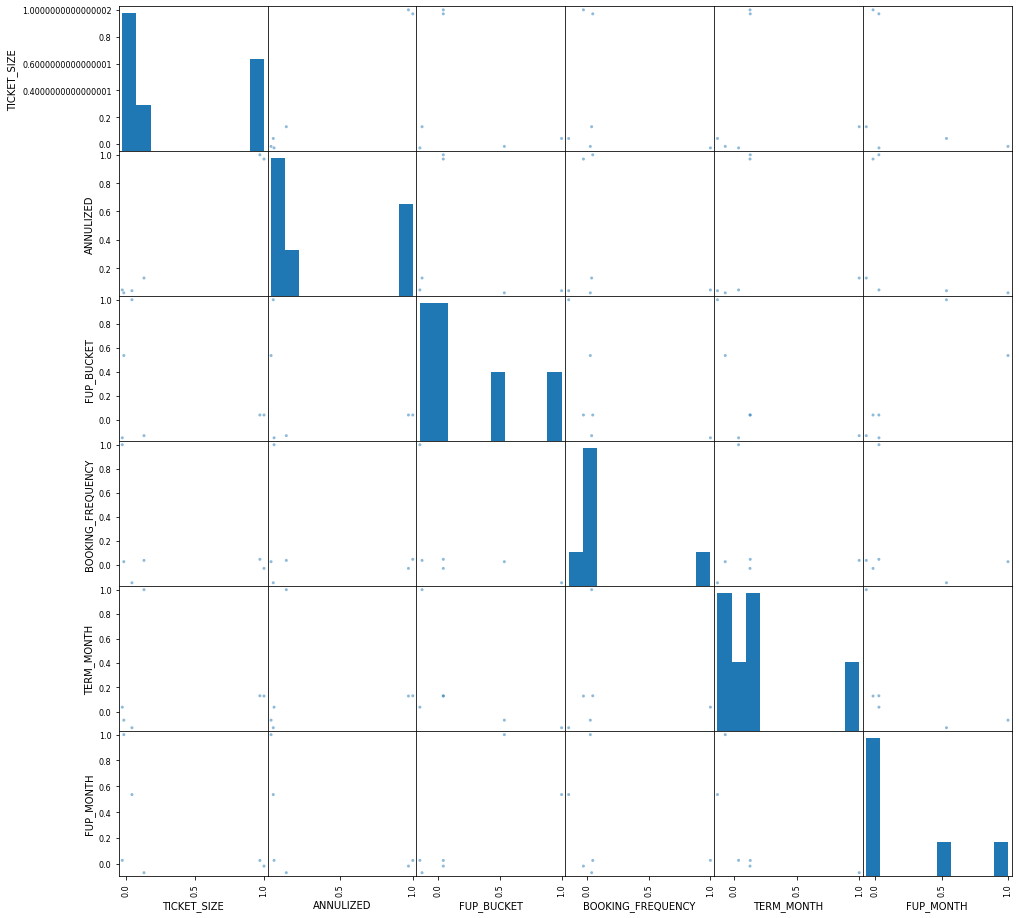

In [125]:
from pandas.plotting import scatter_matrix
scatter_matrix(heat_map,figsize=(16,16))
plt.show()

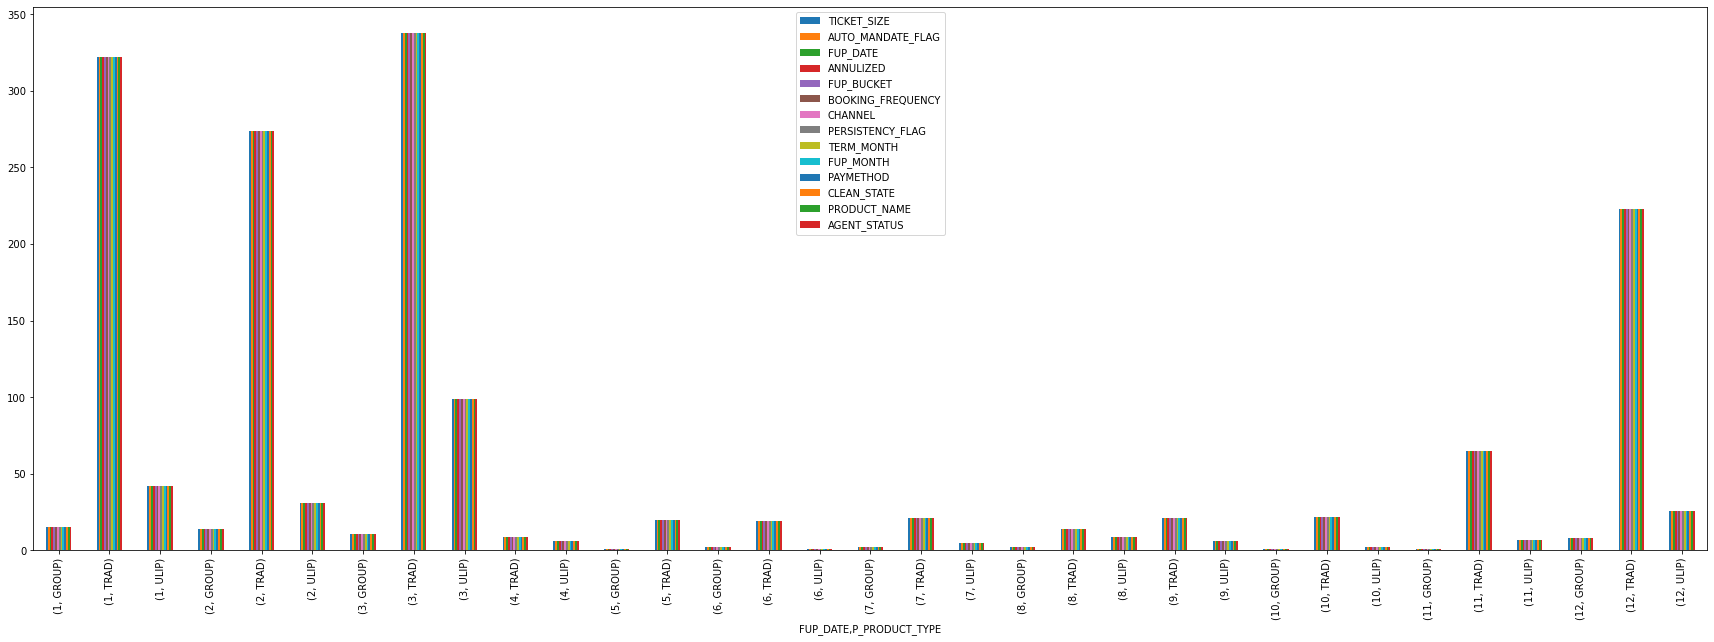

In [181]:
x=df.FUP_DATE.dt.month
y=df.P_PRODUCT_TYPE
# plt.figure(figsize=(30,10))
e=df.groupby([x,y]).count()
e.plot(kind='bar',figsize=(30,10))

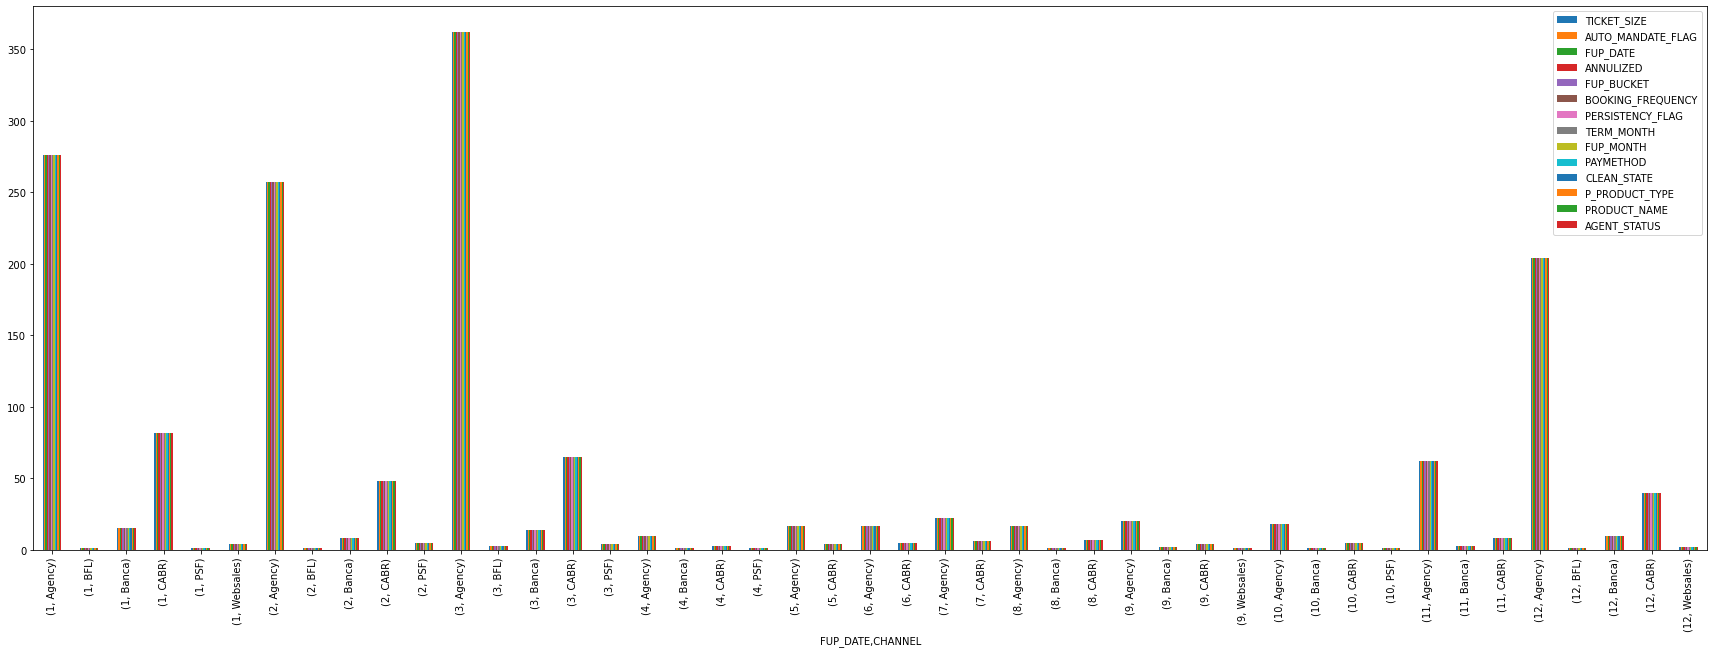

In [192]:
x=df.FUP_DATE.dt.month
y=df.CHANNEL
# plt.figure(figsize=(30,10))
e=df.groupby([x,y]).count()
e.plot(kind='bar',figsize=(30,10))

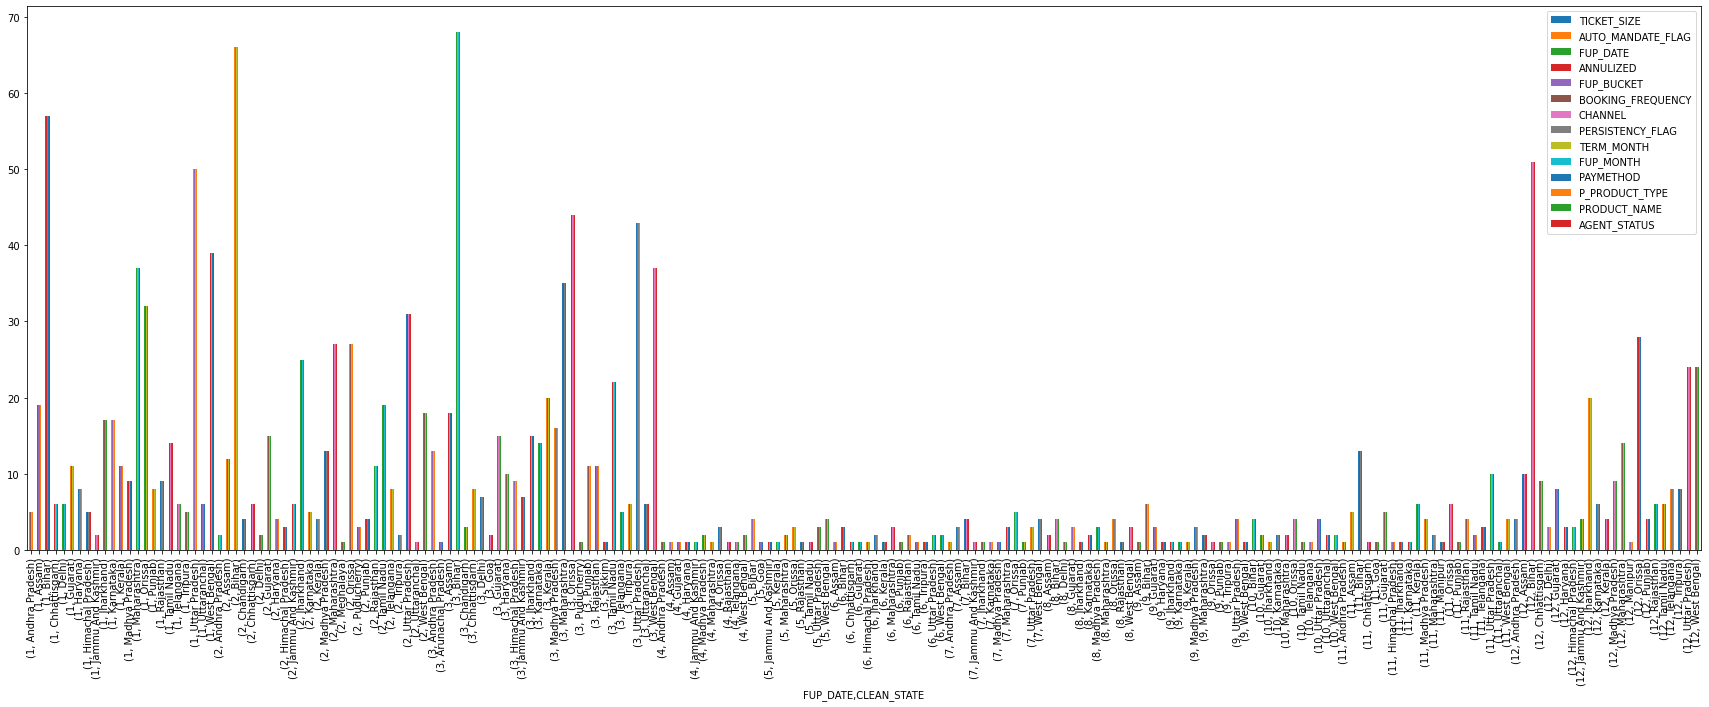

In [193]:
x=df.FUP_DATE.dt.month
y=df.CLEAN_STATE
# plt.figure(figsize=(30,10))
e=df.groupby([x,y]).count()
e.plot(kind='bar',figsize=(30,10))

In [ ]:
x=df.FUP_DATE.dt.month
y=df.CHANNEL
# plt.figure(figsize=(30,10))
e=df.groupby([x,y]).count()
e.plot(kind='bar',figsize=(30,10))

#Correlation

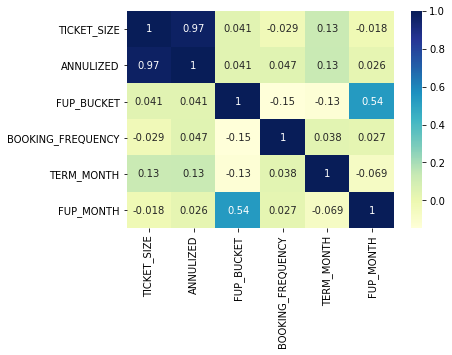

In [111]:
heat_map=df.corr()
sns.heatmap(heat_map,cmap ="YlGnBu",annot =True)

[None, None, None, None, None, None, None, None, None, None, None, None]

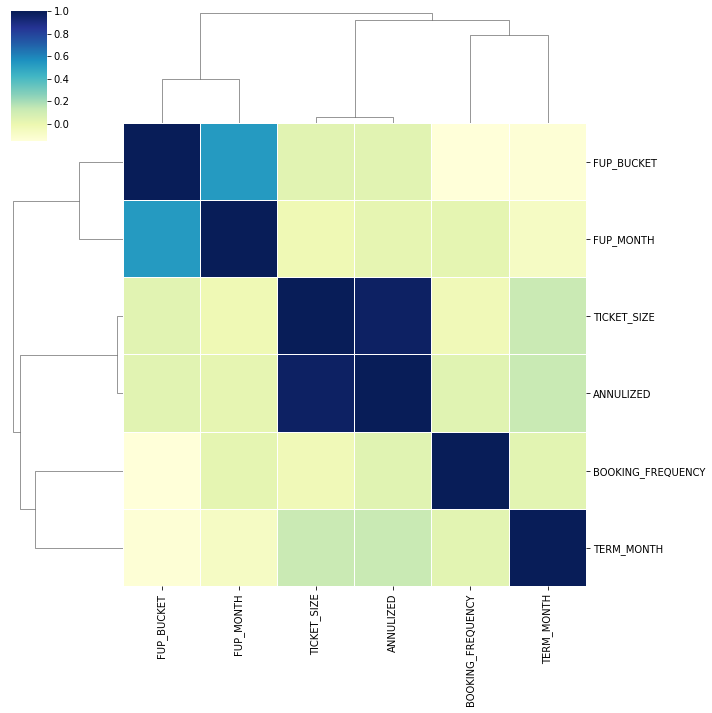

In [114]:
cg=sns.clustermap(heat_map, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels())

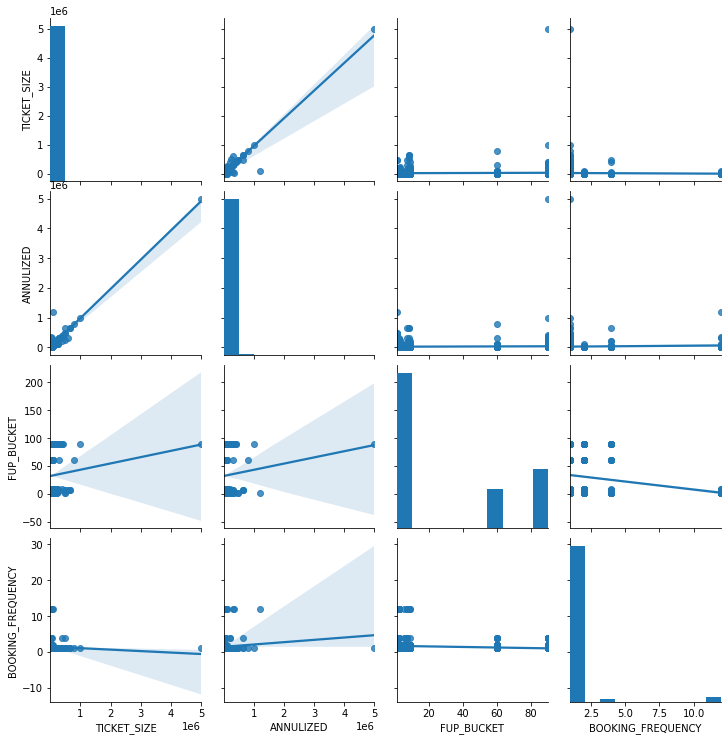

In [15]:
# sns.pairplot(df,palette='Dark2',vars = ['BOOKING_FREQUENCY'  , 'mean texture', 'mean perimeter', 'mean area',
#         'mean smoothness'],hue='AGENT_STATUS')

sns.pairplot(df,vars=['TICKET_SIZE','ANNULIZED','FUP_BUCKET','BOOKING_FREQUENCY'],kind='reg')

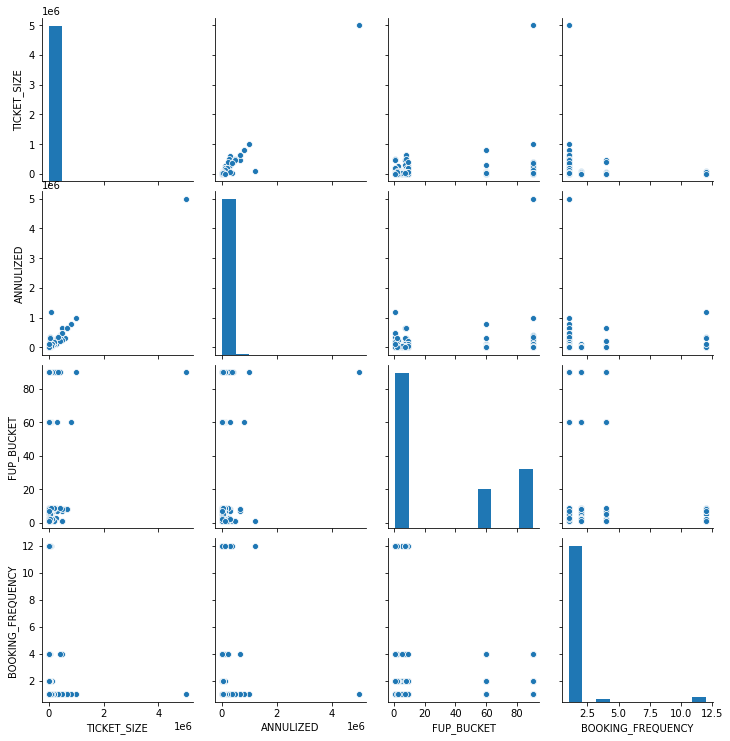

In [16]:
sns.pairplot(df,vars=['TICKET_SIZE','ANNULIZED','FUP_BUCKET','BOOKING_FREQUENCY'])

In [21]:
sns.FacetGrid(df,row='ANNULIZED',hue='AGENT_STATUS')

ValueError: Image size of 216x281448 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 216x281448 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 216x281448 with 1303 Axes>